In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle
import random
from random import randrange

In [2]:
imshow = plt.imshow

Creating a maze and making a numpy array out of it.

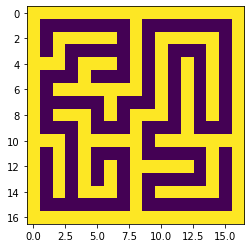

In [3]:
def make_maze(w = 16, h = 8):
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]
 
    def walk(x, y):
        vis[y][x] = 1
 
        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        for (xx, yy) in d:
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "10"
            if yy == y: ver[y][max(x, xx)] = "00"
            walk(xx, yy)
 
    walk(np.random.randint(w), np.random.randint(h))
 
    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])
        
    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)
    return M
 
maze=np.array(make_maze(8,8))
# print(maze)
imshow(maze)

Creating a random solution which will be used later in the Genetic Algorithm.

In [4]:
def createRandomSolution(length):
    solution = np.random.choice(range(4),length)
    return solution

Creates a function to evaluate the solution from "createRandomSolution".
currentLocation starts of by being the start location and then gets changed throughout. targetLocation is the location the AI should reach.

Here the AI is trying to find the path from the starting location [1,1] to the targetLocation.

In [5]:
def evaluateSolution(maze, solution, verbose):
    currentLocation=[1,1]
    targetLocation=[15,15]
    #[down, right, up, left]
    xm=[0,1,0,-1]
    ym=[1,0,-1,0]
    
    n=0

    X=[]
    Y=[]
    steps=np.zeros(maze.shape)
    wallHits=np.zeros(maze.shape)
    # tilesTaken = []
    tilesTooken = []
    tilesTooken.append(currentLocation)
    for step in solution:
        # print(step)
        n+=1
        x,y=currentLocation
        x=x+xm[step]
        y=y+ym[step]
        xy = [x,y]
        tilesTooken.append(xy)
        steps[x][y]+=1
        # print(f'step{x,y}')
        if maze[x,y]==0:
            currentLocation = [x,y]
            X.append(x)
            Y.append(y)
            if x==targetLocation[0] and y==targetLocation[1]:
                if verbose:
                    imshow(maze)
                    plt.plot(Y,X,'ow')
                    plt.figure()
                    plt.subplot(1,2,1)
                    imshow(steps)
                    plt.subplot(1,2,2)
                    imshow(wallHits)
                return n, solution
        else:
            wallHits[x][y] += 1

    return 100000000, solution


A function to create Mutants to use in the GA Algorithm, it stores new mutants in the mutant list.

In [6]:
def makeMutant(solution, my):
    mutant = []
    for c in list(solution):
        if np.random.random()<my:
            rnd = randrange(0,4)
            mutant.append(rnd)
        else:
            mutant.append(c)
    return mutant

In [7]:
#Eaiser to read.
from IPython.display import clear_output

Function to implement the Genetic Algorithm.
It will loop "gen_input" times, and then show the best result.

In [8]:
def GeneticAl(gen_input, my_input):
    generation=0
    solution = createRandomSolution(10000)
    #While loop to loop until the solution finds the best performance.
    gen  = gen_input
    while generation != gen:
        generation+=1
        clear_output(wait=True)
        print(f'Generation: {generation}')
        #Evaluate the solution.
        n1 , solution1= evaluateSolution(maze, solution, False)
        mutant = makeMutant(solution, my = my_input)
        n2 , solution2= evaluateSolution(maze, mutant, False)
        if n1>n2:
            solution = solution2
            n = n2
        if generation == gen:
            print('Time out!')
            print(f'Showing the best solution found:{n}')
            evaluateSolution(maze, solution, True)

Since it is purely random we will not always get perfect solutions to the problem, a way to fix this is by running many generations.

Generation: 500
Time out!
Showing the best solution found:1899


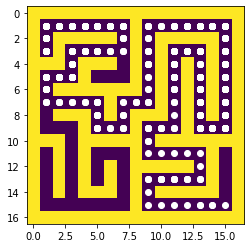

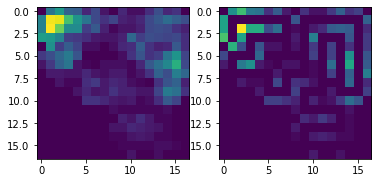

In [9]:
GeneticAl(gen_input=500,my_input=0.001)

In [10]:
GeneticAl(gen_input=1000,my_input=0.001)

Generation: 1000
Time out!


UnboundLocalError: local variable 'n' referenced before assignment

Generation: 500
Time out!
Showing the best solution found:388


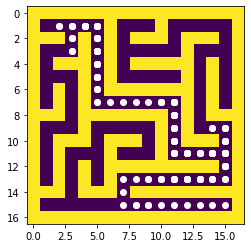

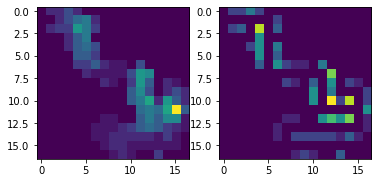

In [ ]:
GeneticAl(gen_input=500,my_input=0.1)

Generation: 5000
Time out!
Showing the best solution found:132


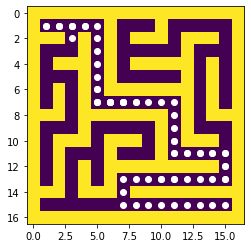

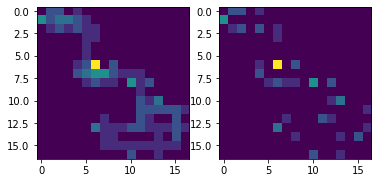

In [ ]:
GeneticAl(gen_input=15000,my_input=0.1)